### Data collection

The data is collected from kaggle. 

Consists of 20 columns and 4888 rows.

In [1]:
### importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
## reading dataset

df = pd.read_csv('Travel.csv')

## first 5 rows
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
## info of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

### Data Cleaning

In [3]:
### Handling missing values

df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [5]:
### categorical variables

cat_vars = [col for col in df.columns if df[col].dtype == 'object']
cat_vars

['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

In [7]:
### check all categories present in categorical variables

for col in cat_vars:
    print(f'Categories of feature {col} are: \n',df[col].value_counts())
    print('--------------------------------------------')

Categories of feature TypeofContact are: 
 TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64
--------------------------------------------
Categories of feature Occupation are: 
 Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64
--------------------------------------------
Categories of feature Gender are: 
 Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64
--------------------------------------------
Categories of feature ProductPitched are: 
 ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64
--------------------------------------------
Categories of feature MaritalStatus are: 
 MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64
--------------------------------------------
Categories of

In [8]:
### replace categories

df['Gender'] = df['Gender'].replace('Fe Male','Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single', 'Unmarried')

In [9]:
### check all categories present in categorical variables

for col in cat_vars:
    print(f'Categories of feature {col} are: \n',df[col].value_counts())
    print('--------------------------------------------')

Categories of feature TypeofContact are: 
 TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64
--------------------------------------------
Categories of feature Occupation are: 
 Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64
--------------------------------------------
Categories of feature Gender are: 
 Gender
Male      2916
Female    1972
Name: count, dtype: int64
--------------------------------------------
Categories of feature ProductPitched are: 
 ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64
--------------------------------------------
Categories of feature MaritalStatus are: 
 MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64
--------------------------------------------
Categories of feature Designation are: 
 Designat

In [11]:
### check missing values

features_with_na = [col for col in df.columns if df[col].isnull().sum()>=1]

for col in features_with_na:
    print(col, np.round(df[col].isnull().mean()*100,5), '% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [12]:
### descriptive stats on numerical values

df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


### Imputing null values

1. impute median value for Age column
2. impute mode value for Type of contact column
3. impute median value for duration of pitch column
4. impute mode value for NumberofFollowups column
5. impoute mode value for PreferredPropertyStar column
6. impute median value for NumberofTrips column
7. impute mode value for NumberofChildren column
8. impute median value for MonthlyIncome column

In [15]:
### Age

df.Age.fillna(df.Age.median(),inplace=True)

### Type of contact
df.TypeofContact.fillna(df.TypeofContact.mode()[0],inplace=True)

### duration of pitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(),inplace=True)

### number of fellowship
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0],inplace=True)

### Number of trips
df.NumberOfTrips.fillna(df.NumberOfTrips.median(),inplace=True)

### number of children visiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0],inplace=True)

### monthly income
df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace=True)

### PreferredPropertyStar
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0],inplace=True)

### check for missing values
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [16]:
### drop columns

df.drop(columns=['CustomerID'],axis=1,inplace=True)

### Feature Engineering

In [17]:
### add new columns

df['TotalVisiting'] = df['NumberOfChildrenVisiting']+df['NumberOfPersonVisiting']
df.drop(columns=['NumberOfChildrenVisiting','NumberOfPersonVisiting'],axis=1,inplace=True)

In [19]:
### numerical features

num_vars = [col for col in df.columns if df[col].dtype != 'object']
print('numberical features: \n', num_vars)
print('length of numerical features: \n', len(num_vars))

numberical features: 
 ['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting']
length of numerical features: 
 12


In [20]:
### numerical features

#num_vars = [col for col in df.columns if df[col].dtype != 'object']
print('categorical features: \n', cat_vars)
print('length of categorical features: \n', len(cat_vars))

categorical features: 
 ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']
length of categorical features: 
 6


In [27]:
### discrete features

discrete_features = [col for col in num_vars if df[col].nunique()<25]
print('discrete features: \n', discrete_features)
print('length of discrete features: \n', len(discrete_features))

discrete features: 
 ['ProdTaken', 'CityTier', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'TotalVisiting']
length of discrete features: 
 9


In [28]:
### continuous features

continuous_features = [col for col in num_vars if col not in discrete_features]
print('continuous features: \n', continuous_features)
print('length of continuous features: \n', len(continuous_features))

continuous features: 
 ['Age', 'DurationOfPitch', 'MonthlyIncome']
length of continuous features: 
 3


### Splitting dataset into train and test dataset

In [30]:
from sklearn.model_selection import train_test_split
X = df.drop(['ProdTaken'],axis=1)
y = df['ProdTaken']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print('Shape of X train: \n', X_train.shape)
print('Shape of X test: \n', X_test.shape)
print('Shape of y train: \n', y_train.shape)
print('Shape of y test: \n', y_test.shape)

Shape of X train: 
 (3910, 17)
Shape of X test: 
 (978, 17)
Shape of y train: 
 (3910,)
Shape of y test: 
 (978,)


In [37]:
### transfomers
cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

encoder = OneHotEncoder(drop='first',sparse_output=False)
scaler = StandardScaler()


preprocessor = ColumnTransformer(
    [
        ("onehotencoder",encoder,cat_features),
        ("standardscaler",scaler, num_features)
    ]
)

In [38]:
X_train = preprocessor.fit_transform(X_train)

X_test = preprocessor.transform(X_test)

### Model Training

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score, recall_score, f1_score,roc_auc_score

In [43]:
models ={
    "Random Forest": RandomForestClassifier(),
    "Decison Tree": DecisionTreeClassifier()
}

for i in range(len(models)):
    ## take the ith model
    model = list(models.values())[i]

    ## fit the model
    model.fit(X_train, y_train)

    ## predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    ## training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train, y_train_pred)
    mode_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    ## testing set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred)
    model_test_precision = precision_score(y_test, y_test_pred)
    mode_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)


    print(list(models.keys())[i])

    print('Model performance for training set')
    print(f"Accuracy: {model_train_accuracy:.4f}")
    print(f"f1 score: {model_train_f1:.4f}")
    print(f"precision: {model_train_precision:.4f}")
    print(f"recall: {mode_train_recall:.4f}")
    print(f"rocauc: {model_train_rocauc_score:.4f}")

    print('Model performance for testing set')
    print(f"Accuracy: {model_test_accuracy:.4f}")
    print(f"f1 score: {model_test_f1:.4f}")
    print(f"precision: {model_test_precision:.4f}")
    print(f"recall: {mode_test_recall:.4f}")
    print(f"rocauc: {model_test_rocauc_score:.4f}")
    
    print('='*35)
    print('\n')

Random Forest
Model performance for training set
Accuracy: 1.0000
f1 score: 1.0000
precision: 1.0000
recall: 1.0000
rocauc: 1.0000
Model performance for testing set
Accuracy: 0.9254
f1 score: 0.7683
precision: 0.9758
recall: 0.6335
rocauc: 0.8148


Decison Tree
Model performance for training set
Accuracy: 1.0000
f1 score: 1.0000
precision: 1.0000
recall: 1.0000
rocauc: 1.0000
Model performance for testing set
Accuracy: 0.9192
f1 score: 0.7893
precision: 0.8043
recall: 0.7749
rocauc: 0.8646




In [44]:
### hyperparamater tuning

params = {
    'max_depth':[5,8,15,None,10],
    'max_features':[5,7,"auto",8],
    "min_samples_split":[2,8,15,20],
    "n_estimators":[100,200,500,1000]
}

In [46]:
### models list for hyperparameter tuning

randomcv_models = [
    ("RF", RandomForestClassifier(), params),
]

In [47]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}

for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator = model,
                                param_distributions=params,
                                n_iter=100,
                                cv=3,
                                verbose=2,
                                n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name]=random.best_params_

for model_name in model_param:
    print(f"Best parameters for {model_name}:")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters for RF:
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 7, 'max_depth': None}


In [48]:
models ={
    "Random Forest": RandomForestClassifier(n_estimators= 1000, min_samples_split= 2, max_features= 7, max_depth= None)
    #"Decison Tree": DecisionTreeClassifier()
}

for i in range(len(models)):
    ## take the ith model
    model = list(models.values())[i]

    ## fit the model
    model.fit(X_train, y_train)

    ## predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    ## training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train, y_train_pred)
    mode_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    ## testing set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred)
    model_test_precision = precision_score(y_test, y_test_pred)
    mode_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)


    print(list(models.keys())[i])

    print('Model performance for training set')
    print(f"Accuracy: {model_train_accuracy:.4f}")
    print(f"f1 score: {model_train_f1:.4f}")
    print(f"precision: {model_train_precision:.4f}")
    print(f"recall: {mode_train_recall:.4f}")
    print(f"rocauc: {model_train_rocauc_score:.4f}")

    print('Model performance for testing set')
    print(f"Accuracy: {model_test_accuracy:.4f}")
    print(f"f1 score: {model_test_f1:.4f}")
    print(f"precision: {model_test_precision:.4f}")
    print(f"recall: {mode_test_recall:.4f}")
    print(f"rocauc: {model_test_rocauc_score:.4f}")
    
    print('='*35)
    print('\n')

Random Forest
Model performance for training set
Accuracy: 1.0000
f1 score: 1.0000
precision: 1.0000
recall: 1.0000
rocauc: 1.0000
Model performance for testing set
Accuracy: 0.9366
f1 score: 0.8110
precision: 0.9708
recall: 0.6963
rocauc: 0.8456




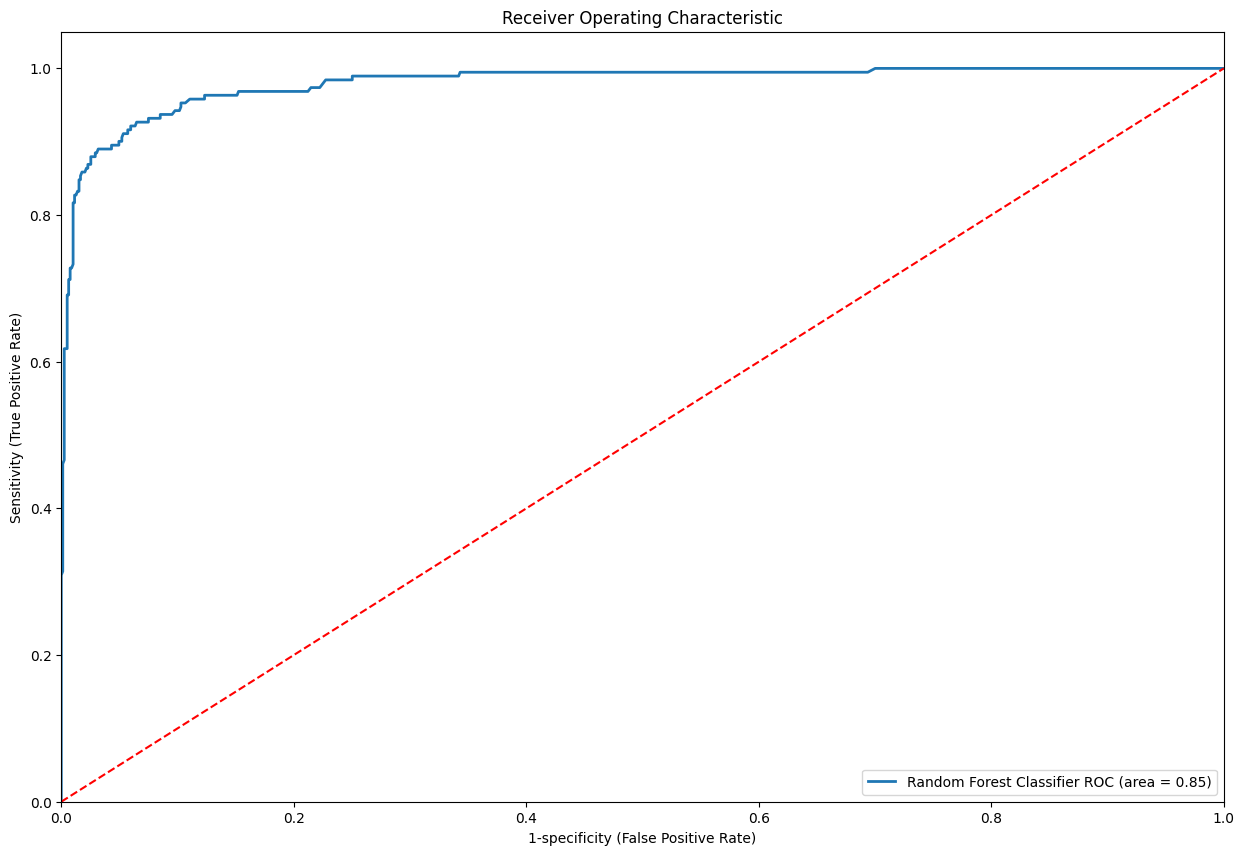

In [49]:
### ROC AUC curve

from sklearn.metrics import roc_curve

plt.figure(figsize=(15,10))

### Add the models to view the ROC plt
auc_models = [
    {
        'label': 'Random Forest Classifier',
        'model': RandomForestClassifier(n_estimators= 1000, min_samples_split= 2, max_features= 7, max_depth= None),
        'auc': 0.8456
    },
]

## create loop through all model

for algo in auc_models:
    model = algo['model'] ## select the model
    model.fit(X_train, y_train)  ## train the model

    ## compute false positive rate and true positive rate
    fpr, tpr, tresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

    ## calculate the area under the curve to display on the plot
    plt.plot(fpr, tpr, label = '%s ROC (area = %0.2f)'% (algo['label'],algo['auc']),linewidth=2)

    ## custom setting for plot
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('1-specificity (False Positive Rate)')
    plt.ylabel('Sensitivity (True Positive Rate)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.savefig("auc.png")
    plt.show()